# Intensité des sécheresses passées

## 1.1. Exploration

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import os
from glob import glob
import pandas as pd

In [26]:
# Load the shapefile
filepath = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
gdf = gpd.read_file(filepath)

# Display the first few rows
print(gdf.head())

# Plot the shapefile (optional)
gdf.plot()

DataSourceError: data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp: No such file or directory

In [ ]:
# Load the GeoJSON file
filepath2 = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"
gdf = gpd.read_file(filepath2)

# Display the first few rows
print(gdf.head())

# Plot the GeoJSON data (optional)
gdf.plot()

In [ ]:
# File paths
shp_path = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
geojson_path = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"

# Load the shapefile (France map)
france_map = gpd.read_file(shp_path)

# Load the geojson file (Drought zones)
drought_zones = gpd.read_file(geojson_path)

# Ensure they have the same CRS (Coordinate Reference System)
if france_map.crs != drought_zones.crs:
    drought_zones = drought_zones.to_crs(france_map.crs)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the France map
france_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# Overlay the drought zones
drought_zones.plot(ax=ax, color='red', alpha=0.5)

# Add title and labels
ax.set_title("Drought Zones in France")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [ ]:
# File paths
shp_path = "data/Intensité_sécheresses_passées/all-zones.shp/all_zones.shp"
geojson_path = "data/Intensité_sécheresses_passées/zones_arretes_en_vigueur.geojson"

# Load the datasets
france_map = gpd.read_file(shp_path)
drought_zones = gpd.read_file(geojson_path)

# Ensure they have the same CRS
if france_map.crs != drought_zones.crs:
    drought_zones = drought_zones.to_crs(france_map.crs)

# Define bounding boxes for the three regions
bbox_metropolitan = (-5.0, 41.0, 10.0, 52.0)  # Roughly Metropolitan France
bbox_caribbean = (-65.0, 10.0, -50.0, 20.0)   # Guadeloupe & Martinique
bbox_reunion = (54.0, -22.0, 56.0, -20.0)     # Réunion Island

# Function to filter based on bounding box
def filter_by_bbox(gdf, bbox):
    minx, miny, maxx, maxy = bbox
    return gdf.cx[minx:maxx, miny:maxy]

# Filter datasets
metropolitan_france = filter_by_bbox(france_map, bbox_metropolitan)
caribbean_france = filter_by_bbox(france_map, bbox_caribbean)
reunion_france = filter_by_bbox(france_map, bbox_reunion)

metropolitan_drought = filter_by_bbox(drought_zones, bbox_metropolitan)
caribbean_drought = filter_by_bbox(drought_zones, bbox_caribbean)
reunion_drought = filter_by_bbox(drought_zones, bbox_reunion)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

regions = [
    ("Metropolitan France", metropolitan_france, metropolitan_drought, axes[0]),
    ("Caribbean (Guadeloupe, Martinique)", caribbean_france, caribbean_drought, axes[1]),
    ("Réunion Island", reunion_france, reunion_drought, axes[2])
]

for title, base_map, drought_map, ax in regions:
    ax.set_title(title)

    if not base_map.empty:
        base_map.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.5)
    
    if not drought_map.empty:
        drought_map.plot(ax=ax, color="red", alpha=0.5)

    # Avoid aspect ratio issues
    ax.set_aspect("auto")  

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

## 1.2. Données 2016

In [27]:
# Define the pattern to match all files (assuming they are in the same directory)
file_pattern = "data\zones_geojson_2016\zones_arretes_en_vigueur_2016-*.geojson"

# Find all matching files in the directory
files = sorted(glob(file_pattern))  # Ensures files are processed in order

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file and process it
for file in files:
    try:
        with open(file, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        # Extract features
        features = data.get("features", [])
        
        # Convert to DataFrame
        df = pd.json_normalize(features)
        
        # Extract the date from the filename (assuming the format is fixed)
        date_str = file.split("_")[-1].replace(".geojson", "")
        
        # Add a new column for the date
        df["date"] = pd.to_datetime(date_str, format="%Y-%m-%d")
        
        # Append to list
        dataframes.append(df)
    
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Combine all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

In [7]:
combined_df

,type,geometry.type,geometry.coordinates,properties.id,properties.idSandre,properties.nom,properties.code,properties.type,properties.niveauGravite,properties.departement.code,properties.departement.nom,properties.arreteRestriction.id,properties.arreteRestriction.numero,properties.arreteRestriction.dateDebut,properties.arreteRestriction.dateFin,properties.arreteRestriction.dateSignature,properties.arreteRestriction.fichier,properties.restrictions,date
0,Feature,MultiPolygon,"[[[[3.923714661, 44.572469138], [3.919741937, ...",6887.0,None,Allier,91_48_0001,SUP,vigilance,48,Lozère,24223.0,2015-261-0004,2015-09-19,2016-01-21,2015-09-18,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-01-01
1,Feature,MultiPolygon,"[[[[3.998163266, 44.459797267], [3.985086578, ...",6888.0,None,Chassezac (y compris amont bv Luech),91_48_0002,SUP,vigilance,48,Lozère,24223.0,2015-261-0004,2015-09-19,2016-01-21,2015-09-18,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-01-01
2,Feature,MultiPolygon,"[[[[3.413243647, 44.648634406], [3.406326924, ...",6889.0,None,Colagne,91_48_0003,SUP,vigilance,48,Lozère,24223.0,2015-261-0004,2015-09-19,2016-01-21,2015-09-18,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-01-01
3,Feature,MultiPolygon,"[[[[3.920851084, 44.305337661], [3.936835115, ...",6890.0,None,Gardons cévenols (partie dpt48),91_48_0004,SUP,vigilance,48,Lozère,24223.0,2015-261-0004,2015-09-19,2016-01-21,2015-09-18,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-01-01
4,Feature,MultiPolygon,"[[[[3.565891675, 44.726436085], [3.558490114, ...",6891.0,None,Truyère,91_48_0005,SUP,vigilance,48,Lozère,24223.0,2015-261-0004,2015-09-19,2016-01-21,2015-09-18,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46119,Feature,MultiPolygon,"[[[[1.690186017, 44.994075566], [1.702662111, ...",6031.0,None,Sourdoire,73_46_5,SUP,vigilance,46,Lot,24874.0,E-2016-278,2016-11-07,2016-12-31,2016-11-07,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-12-31
46120,Feature,MultiPolygon,"[[[[1.089861983, 44.358263206], [1.097534752, ...",6032.0,None,Séoune,73_46_6,SUP,vigilance,46,Lot,24874.0,E-2016-278,2016-11-07,2016-12-31,2016-11-07,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-12-31
46121,Feature,MultiPolygon,"[[[[1.762722493, 44.320665739], [1.755357657, ...",6033.0,None,Lère,73_46_7,SUP,vigilance,46,Lot,24874.0,E-2016-278,2016-11-07,2016-12-31,2016-11-07,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-12-31
46122,Feature,MultiPolygon,"[[[[1.102348921, 44.583112932], [1.112866801, ...",6034.0,None,Thèze,73_46_8,SUP,vigilance,46,Lot,24874.0,E-2016-278,2016-11-07,2016-12-31,2016-11-07,https://regleau.s3.gra.perf.cloud.ovh.net//arr...,[],2016-12-31


In [30]:
# Preparing dataframe for final export
df_export=combined_df.drop(columns=["type","geometry.type","properties.id","properties.idSandre"
                                    ,"properties.type","properties.departement.nom","properties.arreteRestriction.numero"
                                    ,"properties.arreteRestriction.fichier","properties.restrictions"
                                    ,"properties.arreteRestriction.dateSignature","date"
                                   ])

In [33]:
df_export

,geometry.coordinates,properties.nom,properties.code,properties.niveauGravite,properties.departement.code,properties.arreteRestriction.id,properties.arreteRestriction.dateDebut,properties.arreteRestriction.dateFin
0,"[[[[3.923714661, 44.572469138], [3.919741937, ...",Allier,91_48_0001,vigilance,48,24223.0,2015-09-19,2016-01-21
1,"[[[[3.998163266, 44.459797267], [3.985086578, ...",Chassezac (y compris amont bv Luech),91_48_0002,vigilance,48,24223.0,2015-09-19,2016-01-21
2,"[[[[3.413243647, 44.648634406], [3.406326924, ...",Colagne,91_48_0003,vigilance,48,24223.0,2015-09-19,2016-01-21
3,"[[[[3.920851084, 44.305337661], [3.936835115, ...",Gardons cévenols (partie dpt48),91_48_0004,vigilance,48,24223.0,2015-09-19,2016-01-21
4,"[[[[3.565891675, 44.726436085], [3.558490114, ...",Truyère,91_48_0005,vigilance,48,24223.0,2015-09-19,2016-01-21
...,...,...,...,...,...,...,...,...
46119,"[[[[1.690186017, 44.994075566], [1.702662111, ...",Sourdoire,73_46_5,vigilance,46,24874.0,2016-11-07,2016-12-31
46120,"[[[[1.089861983, 44.358263206], [1.097534752, ...",Séoune,73_46_6,vigilance,46,24874.0,2016-11-07,2016-12-31
46121,"[[[[1.762722493, 44.320665739], [1.755357657, ...",Lère,73_46_7,vigilance,46,24874.0,2016-11-07,2016-12-31
46122,"[[[[1.102348921, 44.583112932], [1.112866801, ...",Thèze,73_46_8,vigilance,46,24874.0,2016-11-07,2016-12-31


In [ ]:
# Exporting dataframes
#df_export.to_csv('data/output/Secheresses.csv', index=False)

## 2. Quelques indicateurs / visualisations 

In [17]:
#Type de gravité
combined_df["properties.niveauGravite"].unique()

array(['vigilance', 'alerte', 'alerte_renforcee', 'crise'], dtype=object)

In [18]:
#Nombre d'arrêtés par département 
(combined_df
    .groupby(["properties.departement.nom"])["properties.arreteRestriction.numero"]
    .nunique()
    .reset_index(name="distinct_count")
).sort_values(by="distinct_count", ascending=False)

,properties.departement.nom,distinct_count
15,Deux-Sèvres,48
8,Charente,36
9,Charente-Maritime,32
51,Tarn,25
33,Landes,17
46,Pyrénées-Atlantiques,17
52,Tarn-et-Garonne,13
41,Maine-et-Loire,11
38,Lot,11
21,Gers,11


### Nombre de restriction par jours en 2016

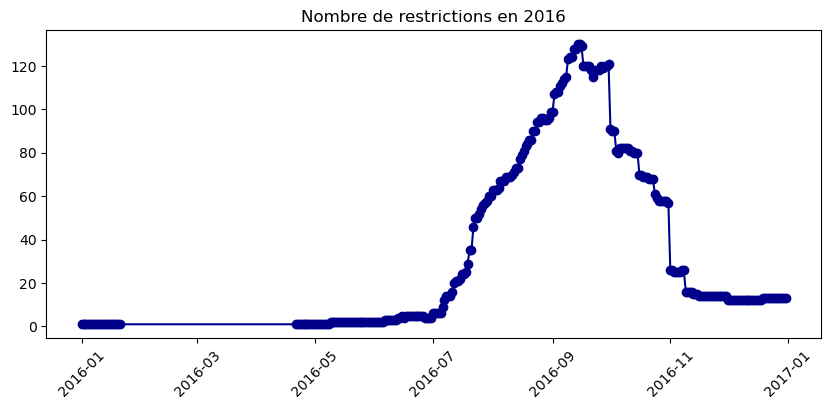

In [16]:
# Group by 'date' and count distinct values of 'properties.arreteRestriction.numero'
time_series_df = (
    combined_df
    .groupby("date")["properties.arreteRestriction.numero"]
    .nunique()
    .reset_index(name="distinct_count")
)

# Sort by date to ensure correct order
time_series_df = time_series_df.sort_values(by="date")

# Plot the line graph
plt.figure(figsize=(10, 4))
plt.plot(time_series_df["date"], time_series_df["distinct_count"], marker="o", linestyle="-",color='#00008B')

# Formatting the plot
plt.title("Nombre de restrictions en 2016")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)

# Show the plot
plt.show()

### Type de gravité par mois en 2016

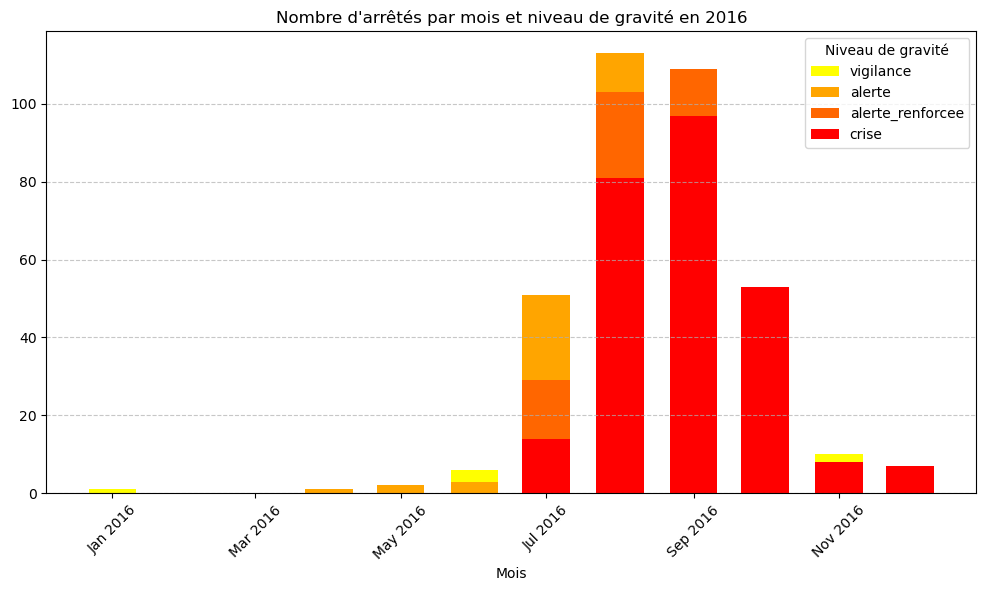

In [11]:
# Extract year-month for aggregation
combined_df["month"] = combined_df["date"].dt.to_period("M")

# Group by 'month' and 'properties.niveauGravite', count distinct 'properties.arreteRestriction.numero'
monthly_grouped_df = (
    combined_df
    .groupby(["month", "properties.niveauGravite"])["properties.arreteRestriction.numero"]
    .nunique()
    .reset_index(name="distinct_count")
)

# Convert 'month' back to datetime for plotting
monthly_grouped_df["month"] = monthly_grouped_df["month"].astype(str)
monthly_grouped_df["month"] = pd.to_datetime(monthly_grouped_df["month"])

# Define a color mapping for 'properties.niveauGravite' (Yellow to Red scale)
gravite_colors = {
    "vigilance": "#FFFF00",  # Yellow
    "alerte": "#FFA500",  # Orange
    "alerte_renforcee" : "#FF6600", # Darker Orange 
    "crise": "#FF0000"  # Red
}

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
bar_width = 20

# Loop through each 'niveauGravite' category and plot the bars
for gravite_level, color in gravite_colors.items():
    subset = monthly_grouped_df[monthly_grouped_df["properties.niveauGravite"] == gravite_level]
    plt.bar(
        subset["month"], 
        subset["distinct_count"], 
        label=gravite_level, 
        color=color,
        width=pd.Timedelta(days=bar_width)
    )

# Formatting the plot
plt.xlabel("Mois")
plt.title("Nombre d'arrêtés par mois et niveau de gravité en 2016")
plt.xticks(rotation=45)
plt.legend(title="Niveau de gravité")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format x-axis as months

# Show the plot
plt.show()
